<a href="https://colab.research.google.com/github/ccbeltran/Talento_Tech/blob/main/Ejercicio_minimo_cuadrados_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## __Ejercicio: Mínimos cuadrados__

> Se quiere revisar el desempeño de la librería de numpy frente a usar ciclos para calcular las fórmulas del método de mínimos cuadrados. Para esto, se debe resolver el ejercicio por los dos métodos, asi como medir y comparar los tiempos.
> - Suponga que tiene un vector de $N$ puntos en el espacio 2D, los cuales tienen una relación lineal. El objetivo es encontrar por el método de mínimos cuadrados los coeficientes de la recta $(a,b)$. Detalles del método los puede encontrar en la [wikipedia](https://es.wikipedia.org/wiki/M%C3%ADnimos_cuadrados)
    - Para generar los puntos haga un vector de valor X aleatorios, luego genere el vector Y como $Y = mx + b + ruido$. Agregue ruido con la distribución normal `N(media=0, desv=0.5)`.
    - Los mínimos cuadrados se calculan mediante las fórmulas: 1) Para calcular la pendiente: $$a = \frac{N \sum_{k=1}^N x_k y_k - \sum_{k=1}^N x_k \sum_{k=1}^N y_k }{N \sum_{k=1}^N x^2_k  - (\sum_{k=1}^N x_k)^2 }$$ <br>
    - 2) Para calcular el intercepto <br>
    $$ b = \frac{\sum_{k=1}^N y_k \sum_{k=1}^N x^2_k - \sum_{k=1}^N x_k \sum_{k=1}^N x_k y_k }{N \sum_{k=1}^N x^2_k  - (\sum_{k=1}^N x_k)^2 }$$ <br>
    - 3) Calcule el error cuadrático medio entre el valor de $y$ menos el calculado con los parámetros de la recta $f(x_k) = a x_k + b$: $$e_k = y_k - f(x_k)$$ <br> $$E_{cm}(f) = \sqrt{\frac{\sum_{k=1}^N e_k^2}{N}}$$

Tiempo de la operación numpy: 0.0011894702911376953
Tiempo de la operación ciclos: 0.025998592376708984
ECM numpy: 0.49983028585484274
ECM ciclos: 0.49983028585484324
a numpy: 4.980349108461258
b numpy: 4.015888373797843
a ciclos: 4.98034910846132
b ciclos: 4.0158883737978215
Tiempo razon: 0.046


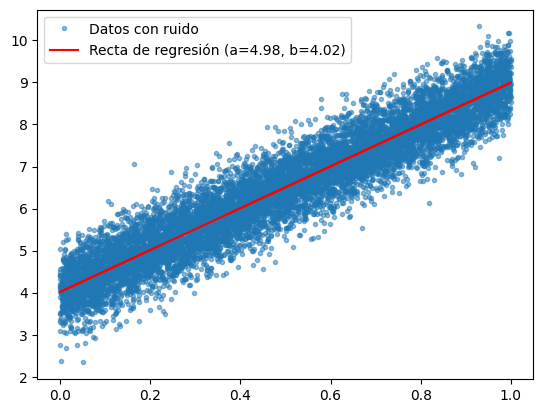

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
import math

N = 10000

np.random.seed(42)
#  Generar los puntos haga un vector de valor X aleatorios, luego genere el vector Y como  𝑌=𝑚𝑥+𝑏+𝑟𝑢𝑖𝑑𝑜 . Agregue ruido con la distribución normal N(media=0, desv=0.5).
x = np.random.random(N)
m = 5
b = 4
ruido = np.random.normal(0, 0.5, N)
y = (m * x) + b + ruido

##Funcion por numpy
def metodo_minimos_cuadrados_numpy(x, y, N):
  st1_i = time.time()
  a = ((N * np.sum(x * y))-(np.sum(x) * np.sum(y))) / ((N * np.sum(x**2))-((np.sum(x))**2))
  b = ((np.sum(y) * np.sum(x ** 2)) - (np.sum(x) * np.sum(x*y))) / ((N * np.sum(x**2)) - ((np.sum(x))**2))
  e = y -((a * x) + b) #a*x+b es la ecuacion de la recta
  ecm = ((np.sum(e**2)) / N) ** 0.5
  st1_f = time.time()
  tiempo = st1_f - st1_i

  return a, b, ecm, tiempo

##Funcion por ciclo

def metodo_minimos_cuadrados_ciclos(x, y, N):
  st1_i = time.time()

  x_y_sum = 0
  x_sum = 0
  y_sum = 0
  x_2_sum = 0

  for k in range(N):
    x_y_sum += x[k] * y[k]
    x_sum += x[k]
    y_sum += y[k]
    x_2_sum += x[k] ** 2

  a = (N * x_y_sum - x_sum * y_sum) / (N * x_2_sum - x_sum ** 2)
  b = (y_sum * x_2_sum - x_sum * x_y_sum) / (N * x_2_sum - x_sum ** 2)
  e = y -((a * x) + b) #a*x+b es la ecuacion de la recta

  e_2_sum = 0
  for k in range(N):
    e_2_sum += e[k] ** 2

  ecm = (e_2_sum / N) ** 0.5
  st1_f = time.time()
  tiempo = st1_f - st1_i

  return a, b, ecm, tiempo

a_numpy, b_numpy, ecm_numpy, tiempo_numpy = metodo_minimos_cuadrados_numpy(x, y, N)
a_ciclos, b_ciclos, ecm_ciclos, tiempo_ciclos = metodo_minimos_cuadrados_ciclos(x, y, N)

print(f'Tiempo de la operación numpy: {tiempo_numpy}')
print(f'Tiempo de la operación ciclos: {tiempo_ciclos}')
print(f'ECM numpy: {ecm_numpy}')
print(f'ECM ciclos: {ecm_ciclos}')
print(f'a numpy: {a_numpy}')
print(f'b numpy: {b_numpy}')
print(f'a ciclos: {a_ciclos}')
print(f'b ciclos: {b_ciclos}')
# Diferencia de velocidad
print(f'Tiempo razon: {round((tiempo_numpy)/(tiempo_ciclos),3)}')

# Generar la recta de regresión usando los coeficientes obtenidos con NumPy
y_pred = a_numpy * x + b_numpy

# Graficar los puntos y la recta de regresión

plt.plot(x, y, ".", label="Datos con ruido", alpha=0.5)
plt.plot(x, y_pred, color="red", label=f"Recta de regresión (a={a_numpy:.2f}, b={b_numpy:.2f})")
plt.legend()
plt.show()